# Oil Production Forecasting

How to Pose a Tme Series Forecasting problem as Supervised learning Algorithm!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Volve.csv', index_col=0,parse_dates=True)
df.head()

,onstreaminject_HRS,BORE_WI_VOL,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P in percentage,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
2007-01-09,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-10,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-11,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-12,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-13,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df_model_preparation = df[df.index.year<= 2014]
df_model_testing = df[df.index.year >= 2015]

In [4]:
df_model_preparation.head()

,onstreaminject_HRS,BORE_WI_VOL,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P in percentage,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
2007-01-09,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-10,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-11,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-12,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-13,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df_original = df_model_preparation.copy()

In [6]:
data = df_original.loc[:,['BORE_OIL_VOL']]

In [7]:
data

,BORE_OIL_VOL
2007-01-09,0.0
2007-01-10,0.0
2007-01-11,0.0
2007-01-12,0.0
2007-01-13,0.0
...,...
2014-12-27,426.0
2014-12-28,423.0
2014-12-29,425.0
2014-12-30,419.0


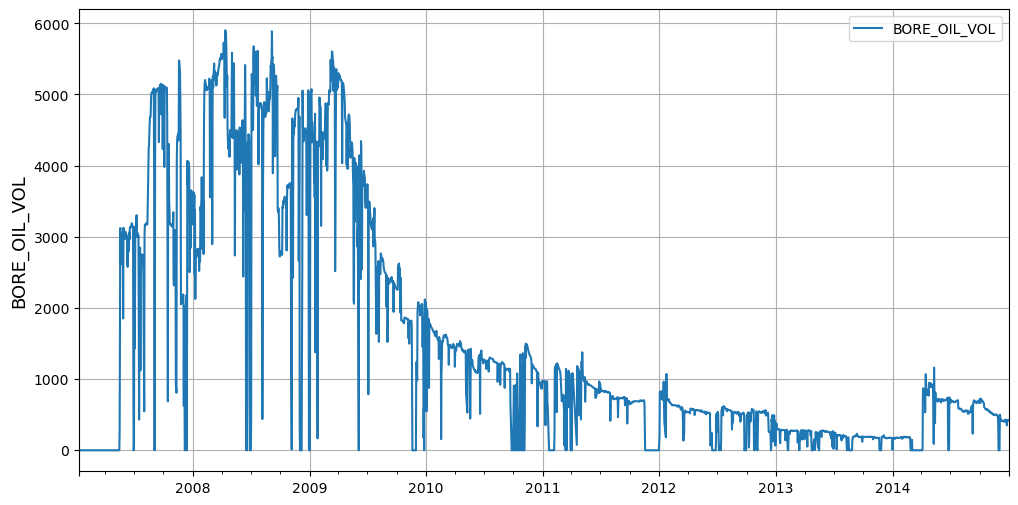

In [8]:
data.plot(figsize=(12,6), grid=True)
plt.ylabel('BORE_OIL_VOL',size=13)
plt.show()

In [9]:
data.shift(1)

,BORE_OIL_VOL
2007-01-09,NaN
2007-01-10,0.0
2007-01-11,0.0
2007-01-12,0.0
2007-01-13,0.0
...,...
2014-12-27,427.0
2014-12-28,426.0
2014-12-29,423.0
2014-12-30,425.0


In [10]:
window = 60

In [13]:
def TS_to_XY(df,n_lags=3, window=60):
    shifted_ys = []
    
    for i in range(1,n_lags+1):
        df[f'y_{i}'] = 0
        df[f'y_{i}'] = df.shift(i+window)
        
    return df

In [15]:
data_Xy = TS_to_XY(data.rolling(30).mean(),1)

ValueError: Columns must be same length as key

In [ ]:
data_X